20213043 이세현

# 서울 기상 정보 분석

문제 1. 1038.9

In [4]:
import pandas as pd

data = pd.read_csv("gts-seoul.csv")
tmp = data[data['일시'] == '2011-03-21 06:00']
tmp['습도'] + tmp['풍속'] + tmp['현지기압'] + tmp['기온'] + tmp['이슬점 온도']

2101    1038.9
dtype: float64

문제 2. 32128.42

In [5]:
data = data[['습도', '풍속', '현지기압', '기온', '이슬점 온도']]
data = data.dropna()
len(data) + data['습도'].mean() + data['풍속'].max() + data['기온'].min()

32128.421619683173

문제 3-1. 1.1892

In [6]:
def pearson_similarity(u1, u2):
    u1_c = u1 - u1.mean()
    u2_c = u2 - u2.mean()
    return (u1_c * u2_c).sum() / (( (u1_c * u1_c).sum() * (u2_c * u2_c).sum() ) ** 0.5)

humidity = pearson_similarity(data['습도'], data['이슬점 온도'])
wind = pearson_similarity(data['풍속'], data['이슬점 온도'])
pressure = pearson_similarity(data['현지기압'], data['이슬점 온도'])
temperature = pearson_similarity(data['기온'], data['이슬점 온도'])
humidity + wind + pressure + temperature

1.1792022126818171

문제 3-2.

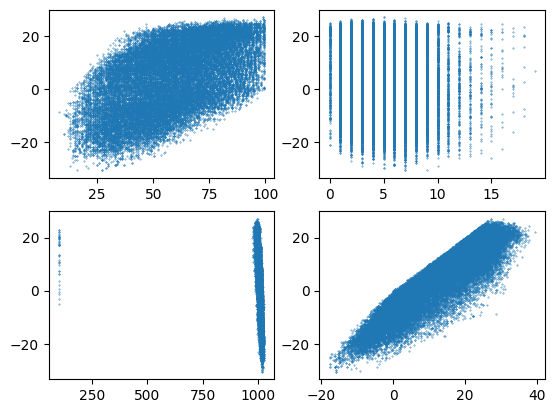

In [7]:
import matplotlib.pyplot as plt

plt.subplot(221)
plt.scatter(data['습도'], data['이슬점 온도'], s=0.1)
plt.subplot(222)
plt.scatter(data['풍속'], data['이슬점 온도'], s=0.1)
plt.subplot(223)
plt.scatter(data['현지기압'], data['이슬점 온도'], s=0.1)
plt.subplot(224)
plt.scatter(data['기온'], data['이슬점 온도'], s=0.1)
plt.show()

문제 3-3. 32027

In [8]:
data = data[data['현지기압'] > 200]
len(data)

32027

문제 3-4. 0.6187

In [9]:
humidity = pearson_similarity(data['습도'], data['이슬점 온도'])
wind = pearson_similarity(data['풍속'], data['이슬점 온도'])
pressure = pearson_similarity(data['현지기압'], data['이슬점 온도'])
temperature = pearson_similarity(data['기온'], data['이슬점 온도'])
humidity + wind + pressure + temperature

0.6187252015474831

문제 3-5.

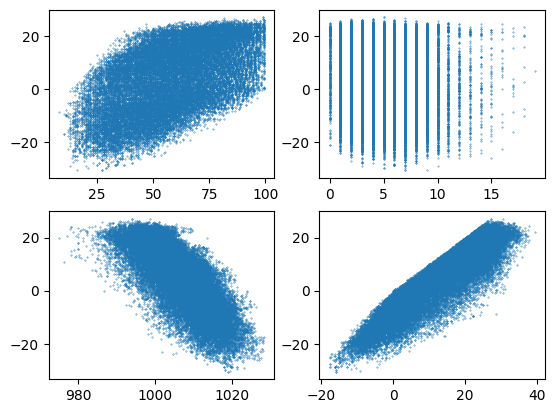

In [10]:
plt.subplot(221)
plt.scatter(data['습도'], data['이슬점 온도'], s=0.1)
plt.subplot(222)
plt.scatter(data['풍속'], data['이슬점 온도'], s=0.1)
plt.subplot(223)
plt.scatter(data['현지기압'], data['이슬점 온도'], s=0.1)
plt.subplot(224)
plt.scatter(data['기온'], data['이슬점 온도'], s=0.1)
plt.show()

문제 4-1. 0.2676329:-0.03078923:0.00952646:0.92936961:-32.91662937401224

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X = data[['습도', '풍속', '현지기압', '기온']]
Y = data['이슬점 온도']

model.fit(X, Y)

print(model.coef_)
print(model.intercept_)

[ 0.2676329  -0.03078923  0.00952646  0.92936961]
-32.91662937401224


문제 4-2. 1.168514629572586

In [12]:
predicted = model.predict(X)
((predicted - Y) ** 2).mean()

1.168514629572586

# 동물 분류하기

문제 1

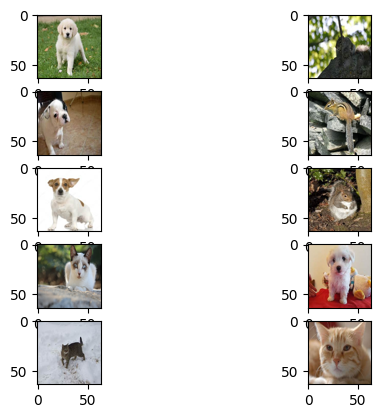

In [13]:
import pickle
import matplotlib.pyplot as plt

data = pickle.load(open("mid_animal_data_pub.pkl", "rb"))
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(data['test1_images'][i])

문제 2. -0.2391

In [14]:
def cosine(a, b):
    return (a*b).sum() / ( ((a*a).sum() * (b*b).sum()) ** 0.5 )

cosine(data['train_vectors'][0], data['test1_vectors'][1])

-0.23914207238931945

문제 3

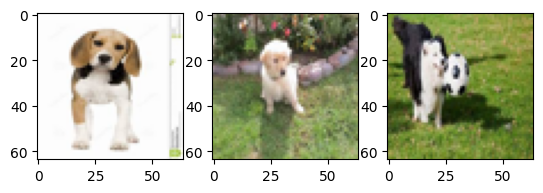

In [15]:
for i in range(10):
    arr = []
    for j in range(data['train_vectors'].shape[0]):
        arr.append((cosine(data['test1_vectors'], data['train_vectors'][j]), j))

    arr.sort(reverse=True)

plt.subplot(131)
plt.imshow(data['train_images'][346])
plt.subplot(132)
plt.imshow(data['train_images'][442])
plt.subplot(133)
plt.imshow(data['train_images'][158])
plt.show()

문제 4.

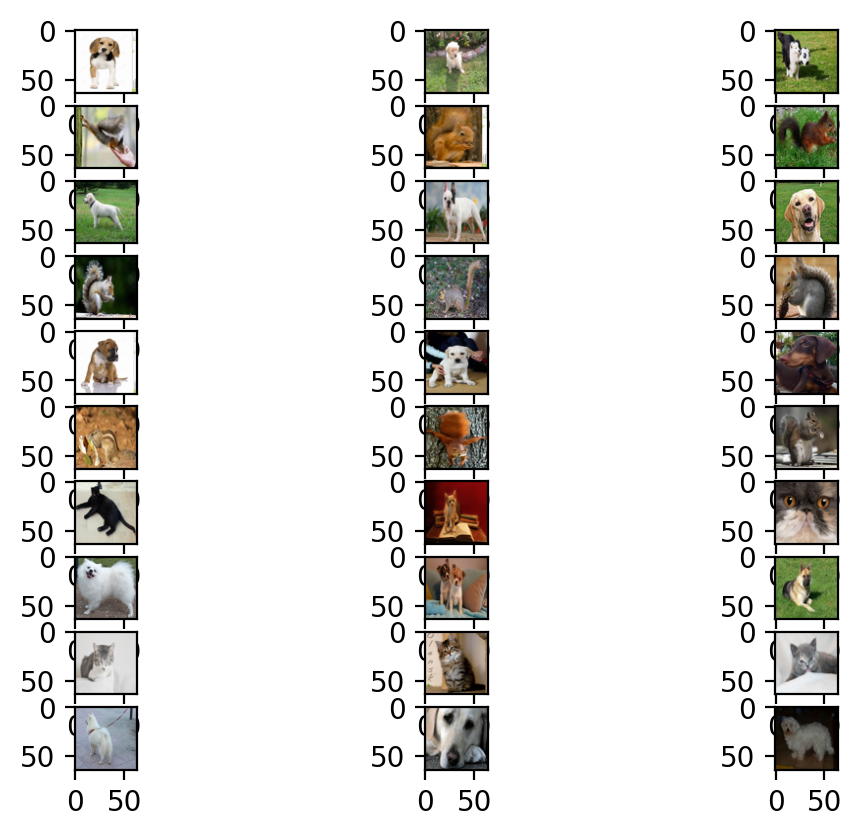

In [17]:
ids = []
for i in range(10):
    arr = []
    for j in range(data['train_vectors'].shape[0]):
        arr.append((cosine(data['test1_vectors'][i], data['train_vectors'][j]), j))

    arr.sort(reverse=True)
    ids.append([i for c, i in arr[:3]])

i = 1
plt.figure(dpi=200)
for arr in ids:
    for j in arr:
        plt.subplot(10, 3, i)
        plt.imshow(data['train_images'][j])
        i += 1
plt.show()


문제 5. train_vectors:train_labels:256:3:model.parameters():cross_entropy

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F

x_train = torch.from_numpy(data["train_vectors"])
y_train = torch.from_numpy(data["train_labels"])

model = nn.Linear(256, 3)

optim = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(10001):
    z = model(x_train)
    cost = F.cross_entropy(z, y_train)

    optim.zero_grad()
    cost.backward()
    optim.step()

    with torch.no_grad():
        if epoch % 1000 == 0:
            print(f"epoch: {epoch}, cost: {cost.item()}")

/home/sehyeon/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


epoch: 0, cost: 4.306881904602051
epoch: 1000, cost: 4.965936386724934e-05
epoch: 2000, cost: 3.518197627272457e-05
epoch: 3000, cost: 2.3466691345674917e-05
epoch: 4000, cost: 1.5302846804843284e-05
epoch: 5000, cost: 9.923525794874877e-06
epoch: 6000, cost: 6.418115390260937e-06
epoch: 7000, cost: 4.1296534618595615e-06
epoch: 8000, cost: 2.637433681229595e-06
epoch: 9000, cost: 1.6708081602700986e-06
epoch: 10000, cost: 1.050365540322673e-06


문제 6. 212220001122112100202120111122

In [23]:
test2 = torch.from_numpy(data['test2_vectors'])
"".join([str(x) for x in torch.argmax(model(test2), dim=1).tolist()])


'212220001122112100202120111122'